> mnist 이미지 분류

In [13]:
import zipfile
with zipfile.ZipFile('c:/vscode/data/mnist/dataset.zip') as zip_ref:
    zip_ref.extractall('c:/vscode/data/mnist/')

In [14]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,data_home='c:/vscode/data/mnist', as_frame=False)

In [15]:
import numpy as np
X, y = mnist["data"], mnist["target"]
y = y.astype(np.int64)
print(X.shape, y.shape)

(70000, 784) (70000,)


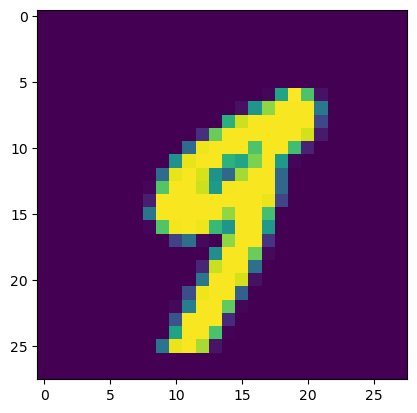

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image)
plt.show()

In [4]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary)
    plt.axis("off")

9

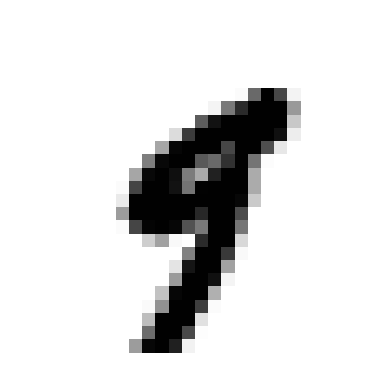

In [17]:
plot_digit(X[36000])
y[36000]

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [19]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [20]:
# 이진 분류기
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [21]:
#확률적 경사하강법 분류모형(온라인학습)
#확률적 경사하강법(Stochastic Gradient Descent, SGD)
#무작위로 1개의 데이터를 추출하여 기울기를 계산
#빠르게 최적점을 찾을 수 있는 알고리즘
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, random_state=0)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([False])

In [22]:
#교차검증
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.96005, 0.8625 , 0.9528 ])

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import numpy as np

#클래스 비율이 유지되는 교차검증
skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    #분류모형을 복제(데이터는 복제하지 않음)
    clone_clf = clone(sgd_clf)

    #학습용,검증용 구분
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]

    #학습
    clone_clf.fit(X_train_folds, y_train_folds)

    #분류
    y_pred = clone_clf.predict(X_test_folds)
    
    #정확도
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.96005


c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.8625
0.9528


c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [24]:
#모든 예측결과를 False로 리턴하는 테스트용 클래스
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        # 2원 영배열(행의수는 샘플개수), 0을 False로 리턴
        return np.zeros((len(X), 1), dtype=bool)

In [25]:
never_5_clf = Never5Classifier()
print(never_5_clf.predict(X_train))
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
#정확도가 높음(이미지의 10%가 5이므로 5가 아니라고 분류하면 100-10=90% 정도의 정확도를 가짐)
#이 모형은 좋은 모형이 아님, 특히 불균형 데이터셋의 경우 정확도는 큰 의미가 없을 수 있음

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


array([0.91095, 0.9083 , 0.9097 ])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(never_5_clf.predict(X_train), y_train_5))

              precision    recall  f1-score   support

       False       1.00      0.91      0.95     60000
        True       0.00      0.00      0.00         0

    accuracy                           0.91     60000
   macro avg       0.50      0.45      0.48     60000
weighted avg       1.00      0.91      0.95     60000



c:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = sgd_clf.predict(X_train)
#오차행렬
cm=confusion_matrix(y_train_5, y_train_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

[[53844   735]
 [ 1326  4095]]
53844 735 1326 4095


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score
#정밀도 : TP / (TP+FP) , 모형이 1로 분류한 것 중 실제로 1인 것의 비율
print(precision_score(y_train_5, y_train_pred))
print(tp/(tp+fp))

#민감도(TPR, True Positive Rate) - 1을 1로 잘 맞춘 비율, 
# 재현율(recall)이라고도 함
print(recall_score(y_train_5, y_train_pred))
print(tp/(tp+fn))

# 정밀도와 재현율의 조화 평균
f1_score(y_train_5, y_train_pred)
# 정밀도와 재현율은 반비례하는 관계 : 정밀도를 높이면 재현율이 떨어지고 재현율이 높아지면 정밀도가 낮아짐
# 정밀도/재현율 트레이드오프라고 함

0.8478260869565217
0.8478260869565217
0.7553956834532374
0.7553956834532374


0.7989464442493415

In [29]:
#sgd 모형의 판별 함수
y_scores = sgd_clf.decision_function([some_digit])
y_scores


array([-154559.86888638])

In [30]:
#판별함수의 값 0을 기준으로 분류하는 경우
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred # False로 분류됨

array([False])

In [31]:
#판별함수의 결과값을 조절함
threshold = -417921
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [32]:
#예측결과가 아닌 결정점수를 리턴하는 교차검증
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,
                            cv=3,method="decision_function")
print(y_scores)
print(y_scores.shape)

c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[ 184922.34161751 -932443.86418448 -580301.962981   ... -151835.50507918
 -962750.38525269  375624.88029587]
(60000,)


c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


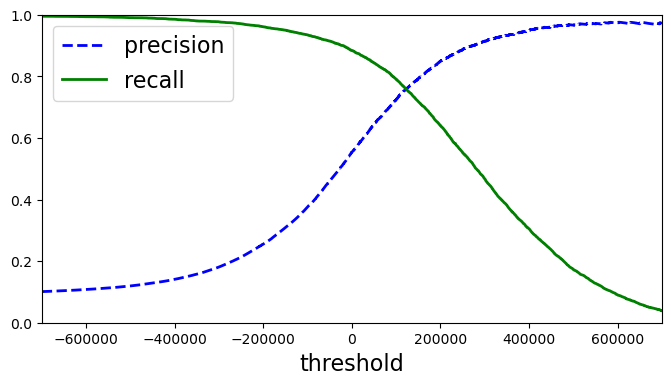

In [33]:
from sklearn.metrics import precision_recall_curve
#판별함수의 결과값을 이용하여 모든 임계값에 대한 정밀도와 재현율 계산
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--",
            label="precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="recall",
            linewidth=2)
    plt.xlabel("threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()
#판별기준을 높이면 정밀도는 높아지고 재현율은 낮아짐
#판별기준을 낮추면 정밀도는 낮아지고 재현율은 높아짐

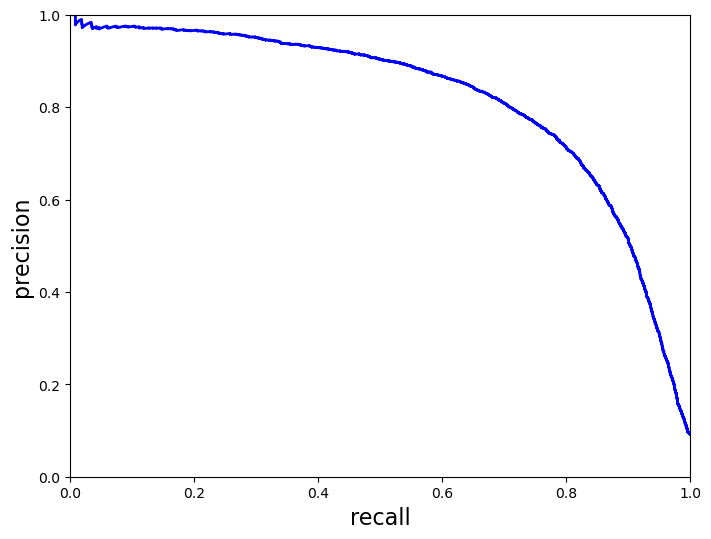

In [34]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("recall", fontsize=16)
    plt.ylabel("precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()
#precision과 recall은 반비례 관계

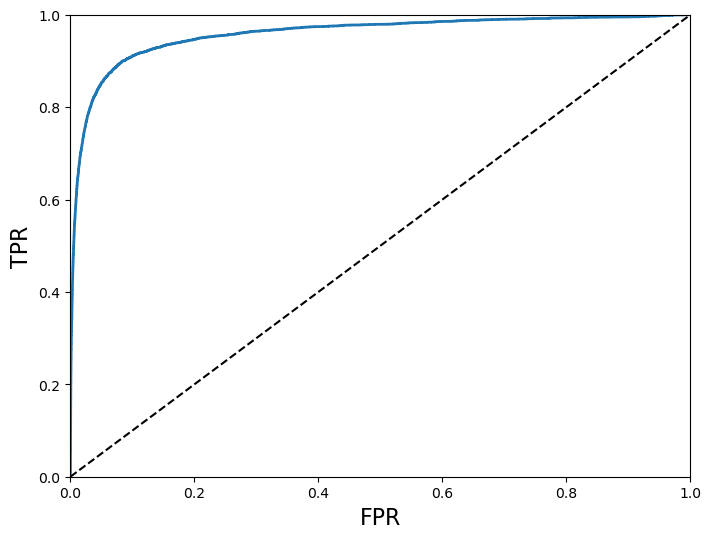

In [35]:
# ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR', fontsize=16)
    plt.ylabel('TPR', fontsize=16)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)
#면적이 1에 가까울수록 완벽한 모형, 0.5이면 완전한 랜덤 분류기

0.9585184048660593

In [37]:
#sgd 모형과 비교하기 위하여 랜덤포레스트모형 추가
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)

# predict_proba : 랜덤포레스트에서 decision_function() 대신 제공되는 함수
y_probas_forest = cross_val_predict(forest_clf, X_train,
                            y_train_5, cv=3,method="predict_proba")

In [38]:
y_probas_forest # 0일 확률, 1일 확률

array([[0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ]])

In [39]:
y_scores_forest = y_probas_forest[:, 1] # 1일 확률
print(y_scores_forest)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

[0.6 0.  0.  ... 0.  0.2 1. ]


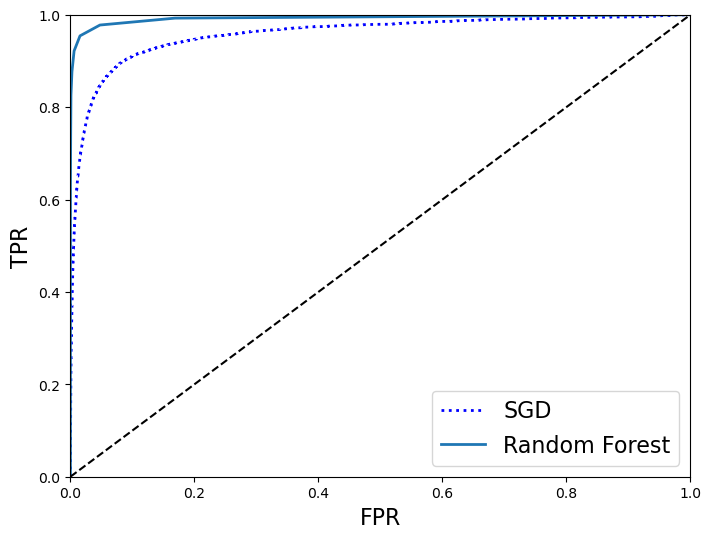

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [41]:
#sgd보다 랜덤포레스트 모형의 성능이 더 좋음
roc_auc_score(y_train_5, y_scores_forest)

0.9925974699144235

In [42]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train,
                                        y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9891736632788334

In [43]:
recall_score(y_train_5, y_train_pred_forest)

0.8258623870134661

* 다중 분류

In [44]:
#다중분류를 위해 모든 데이터를 학습에 사용
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])
#내부적으로 10개의 이진분류기를 훈련시키고 각각의 결정점수를 비교하여 가장 점수가 높은 클래스를 선택함

c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([4], dtype=int64)

In [45]:
#판별함수 확인, 클래스별로 10개의 점수가 출력됨
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)
#가장 높은 점수 출력
print(np.argmax(some_digit_scores))
#라벨(클래스) 리스트
print(sgd_clf.classes_)
#분류한 라벨 이름
print(sgd_clf.classes_[5])

[[-7.62112527e+05 -4.60791095e+05 -7.88618141e+05 -8.38624964e+02
   2.27954632e+04 -1.91841876e+05 -9.07272991e+05 -1.97818141e+05
  -2.59996718e+05 -9.96632266e+04]]
4
[0 1 2 3 4 5 6 7 8 9]
5


In [46]:
#일대일전략을 사용하도록 지정하는 방법
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=0))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

len(ovo_clf.estimators_) #일대일전략에서 사용하는 분류기의 개수
pred=ovo_clf.predict(X_test)
np.mean(pred == y_test)

c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum

0.9179

In [47]:
#1대다 전략(0과 1~9)
from sklearn.multiclass import OneVsRestClassifier

ovr_clf=OneVsRestClassifier(SGDClassifier(max_iter=5,
random_state=10))
ovr_clf.fit(X_train, y_train)

len(ovr_clf.estimators_) #분류기 개수
pred=ovr_clf.predict(X_test)
np.mean(pred == y_test)

c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum

0.8806

In [48]:
# 다중 레이블 분류
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7) #7,8,9
y_train_odd = (y_train % 2 == 1) #홀수
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit])
# 7,8,9에 해당되고 홀수이다

c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[ True,  True]])